# Image processing
# Lab III - Neighbourhood operations. Nonlinear Filtering

## 1. Nonlinear filters. Rank-order filters
The previous lab tackled the general aspects of neighbourhood operations and linear filtering, as an example. That particular kind of filter is suited in some denoising tasks. <b>In case an image is affected by Gaussian (normal) noise, it can be improved by applying a filter that averages the values in each neighbourhood.</b> Nonlinear filters are a class of filters where the output of the filter <b>is not a linear combination of other pixels.</b>

For different types of noise, linear filtering is not adequate. A different kind of noise is the <i>impulsive</i> noise (also called "salt and pepper" noise). This kind of noise affects only some pixels in the image, but completely corrupts the values of the pixels, by making them black (0) or white(1 or 255, depending if the image is scaled or not).
<img src="media/sp_lena.png"><center>Example of an image affected by impulsive noise</center>

In this case, the use of an average filter would only spread the noise to other pixels. For problems like these, a class of nonlinear filters called rank-order filters are best suited to solve the issue. This class of filters does not combine the values in the neighbourhood, instead selecting just one of the values in the neighbourhood using a certain criterion.

## 2. Algorithm and different types of rank-order filters
As was previously stated, rank-order filters select just one of the values of the neighbourhood, based on a decision process.  The main idea is to sort the values in the neighbourhood and pick the position needed to get the best suited pixel for our task. From the point of view of what value is selected, some examples of rank-order filters are:
 - min-filter, which selects the lowest value in the neighbourhood;
 - max-filter, which selects the highest value in the neighbourhood;
 - median filter, which selects the middle value.
 
The algorithm for the median filter is the following:
 - select pixel and neighbourhood
 - sort the pixels in the neighbourhood in an ascending order;
 - the value of the pixel in the output image is the one in the middle of the sorted vector of values (the fifth one, if the neighbourhood is 3x3);
 - repeat for every pixel (neigbhourhood) in the image.
 
<img src="media/median_filter.png"><center>Example of using the median filer on a neighbourhood</center>

### Exercise 1. Read an image (and convert it to grayscale). Add salt and pepper noise to the image. Apply the median filter to the image. Show the original noisy image, and the filtered one.

In order to add salt and pepper noise to a image we need an extra module from scikit-image, so change the import accordingly:
```python
from skimage import io,util,color
```
To add the noise, add this <b>just after you convert the image to grayscale</b>:
```python
img = util.random_noise(img,'s&p')
img = img * 255 # We still want to scale the values to 0...255
```

To sort in an ascending order the values of a matrix ```N```  into a vector, use numpy:
```python
N = np.sort(N,None)
```

Text(0.5, 1.0, 'Image filtered 3x3')

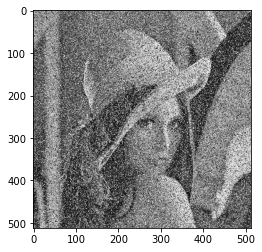

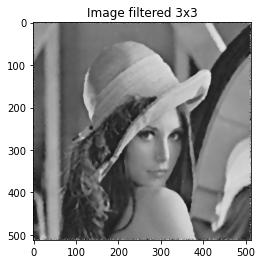

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io,util,color

img_original = io.imread('lena.png')
img_gray=np.copy(img_original)
# Convert the image to a gray scale with values between 0-1 and multiply for 255
img_gray=color.rgb2gray(img_original)
img_noise=util.random_noise(img_gray,'s&p',amount=0.3)
img_noise=(img_noise*255).astype(int)

plt.figure(),plt.imshow(img_noise,cmap='gray')

# initiate the kernel 3
mask_size = 7
mask = np.ones([mask_size,mask_size])*1/mask_size**2

# initiate the output image 3

img_filtered_3 =np.copy(img_noise)
for i in range(mask_size//2,img_noise.shape[0]-mask_size//2):
    for j in range(mask_size//2,img_noise.shape[1]-mask_size//2):
        V = img_noise[i-mask_size//2:i+mask_size//2+1,j-mask_size//2:j+mask_size//2+1]
        n=np.sort(V,None)
        img_filtered_3[i,j] =n[V.size//2]
        
        
plt.figure(), plt.imshow(img_filtered_3,cmap='gray',vmin=0,vmax=255)
plt.title("Image filtered 3x3")

In [27]:
type(V.size/2)

float

### Exercise 2. Try to select different positions from the sorted vector (max, min, or other values between them) and see the how that impacts the noisy image. Test them on the original image (no noise) as well.

Text(0.5, 1.0, 'Image filtered 3x3')

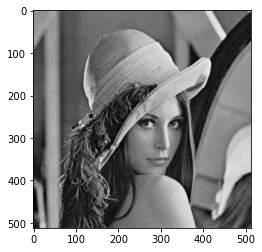

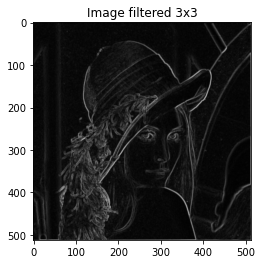

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io,util,color

img_original = io.imread('lena.png')
img_gray=np.copy(img_original)
# Convert the image to a gray scale with values between 0-1 and multiply for 255
img_gray=color.rgb2gray(img_original)
img_noise=util.random_noise(img_gray,'s&p',amount=0.0)
img_noise=(img_noise*255).astype(int)

plt.figure(),plt.imshow(img_noise,cmap='gray')

# initiate the kernel 3
mask_size = 3
mask = np.ones([mask_size,mask_size])*1/mask_size**2

# initiate the output image 3

img_filtered_3 =np.copy(img_noise)
for i in range(mask_size//2,img_noise.shape[0]-mask_size//2):
    for j in range(mask_size//2,img_noise.shape[1]-mask_size//2):
        V = img_noise[i-mask_size//2:i+mask_size//2+1,j-mask_size//2:j+mask_size//2+1]
        n=np.sort(V,None)
        img_filtered_3[i,j] =n[8]-n[0]
    
        
plt.figure(), plt.imshow(img_filtered_3,cmap='gray',vmin=0,vmax=255)
plt.title("Image filtered 3x3")

## RECAP (IMPORTANT)!!!
We have studied two types of noise:
 - Gaussian, which is aditive (the values of a gaussian distribution are added to the image). We studied it in the second lab, and to filter it, we need an average filter (linear filtering).
 <img src="media/gauss_lena.png">
 - Impulsive (salt and pepper), which corrupts the values of some pixels to extreme values. We studied it today, and to filter it, we need a median filter (nonlinear filtering).
 <img src="media/sp_lena.png">